In [2]:
import requests
from bs4 import BeautifulSoup

req = requests.get("https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=190568&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1")
html = req.text

soup = BeautifulSoup(html, 'html.parser')

for item, i in zip(soup.select(".score_result .score_reple"), range(1,15)):
    result = item.text
    result = result.replace('\t','')
    result = result.replace('\r','')
    result = result.replace('\n','')
    print(result)

생각보다 존잼임, 집에 와서 따라하다가 엄마한테 쳐맞음 cher****2020.04.01 18:13신고
관람객갓 엽문.. 견자단형님 존경합니다 엽문의 파이널 마지막시리즈를 영화관에서 배웅합니다 꼭보세요 상영관이 많지 않은게 아쉽네요 산(kiho****)2020.04.02 19:54신고
박평식은 답이없다 걍 평론가는 개나소나하는듯 sake(insu****)2020.04.01 15:48신고
영화가 이렇다 저렇다 말하고 싶지 않습니다. 단지 11년간 그의 여정을 지켜본 팬으로서 그의 액션을 마지막으로 한번 더 볼 수 있어서 마지막 여정을 함께할 수 있어 행복했습니다. 굿바이 나의 영웅. justdoit(gil0****)2020.04.02 00:36신고
박평식 평론가 아침체조하듯 씩씩하게??말을참 x같이하네 체조라도 해보기도햇슈??저런체조도 수OO노력해야 가능한거야영화를 평론하는사람인지 조롱할라고글을적은건지..ㅉㅉ 부모인성이 보인다 나이값좀하고 글쓰세요 블랙야크(pjh8****)2020.04.03 00:38신고
코로나때문에 답답해주글것같았는데 국밥 한사바리 한것처럼 시워어언해지는 액션이었읍니다 goo1****2020.04.01 13:28신고
자단이형 이제 보내주자후속편도 최선을 다한게보인다..다명장면이지만 1화부터 영상 쫙나올때 너무 찡했다...미국에 록키가있다면 쭝국엔 엽문이 있다...우리나라엔...장군의아들?ㅋㅋㅋ중국액션 예전에비해 많이 시들해졌는데...youn****2020.04.02 04:34신고
견자단=엽문, 엽문=견자단. 이번 작품도 견자단 형님이 씹어먹으셨다...마지막이라는게 믿기지 않는다. wowl****2020.04.01 13:19신고
박평식같은 평론가가 정말싫다, 재수없다. silba16(silb****)2020.04.08 23:11신고
중국 정통무술의 마지막 영화라는 것만으로도 볼 의미 충분함 현정(ahj9****)2020.04.01 13:34신고


In [404]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [405]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1')

In [406]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [407]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [408]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [410]:
data['v2'].nunique(), data['v1'].nunique()

(5169, 2)

In [411]:
data.drop_duplicates(subset=['v2'], inplace=True) # v2 열에서 중복인 내용이 있다면 중복 제거

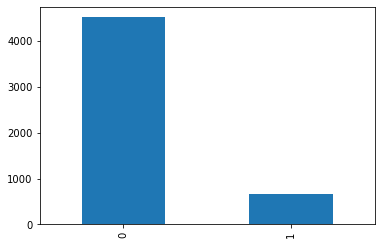

In [412]:
data['v1'].value_counts().plot(kind='bar');

In [413]:
print(data.groupby('v1').size().reset_index(name='count'))

   v1  count
0   0   4516
1   1    653


In [414]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [415]:
y_data

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int64

In [425]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장

In [463]:
sample = ['hi my name is minsu']
tokenizer.fit_on_texts(sample) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(sample) # 단어를 숫자값, 인덱스로 변환하여 저장

In [464]:
print(sequences[:5])

[[87, 11, 234, 9, 1016]]


In [417]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'at': 26, 'can': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, 'go': 44, '4': 45, 'free': 46, 'how': 47, 'when': 48, 'from': 49, 'ok': 50, 'out': 51, 'all': 52, 'what': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'come': 59, 'am': 60, 'was': 61, 'time': 62, 'its': 63, 'only': 64, 'day': 65, 'want': 66, 'love': 67, 'there': 68, 'he': 69, 'send': 70, 'text': 71, 'going': 72, 'n': 73, 'one': 74, 'need': 75, 'by': 76, 'k': 77, 'lor': 78, 'home': 79, 'as': 80, 'r': 81, 'stop': 82, 'about': 83, 'still': 84, 'see': 85, 'txt': 86, 'back': 87, 'e': 88, 'da': 89, 'today': 90, 'our': 91, "i'll": 92, 'mo

In [353]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4908
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.02242152466368
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.082538108811501


In [354]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8921


In [355]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


메일의 최대 길이 : 189
메일의 평균 길이 : 15.610370


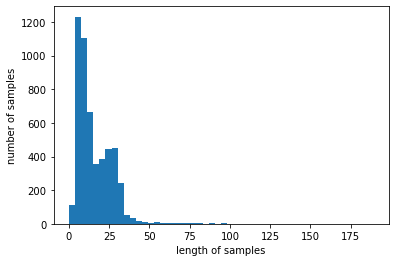

In [356]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [357]:
max_len = 189
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (5169, 189)


In [358]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

In [359]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [360]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [361]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_spam.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - ETA: 0s - loss: 0.4211 - acc: 0.8525
Epoch 00001: val_acc improved from -inf to 0.87304, saving model to best_model_spam.h5
52/52 [==============================] - 3s 66ms/step - loss: 0.4211 - acc: 0.8525 - val_loss: 0.3158 - val_acc: 0.8730
Epoch 2/4
52/52 [==============================] - ETA: 0s - loss: 0.1719 - acc: 0.9498- ETA: 0s - loss: 0.1
Epoch 00002: val_acc improved from 0.87304 to 0.96614, saving model to best_model_spam.h5
52/52 [==============================] - 3s 65ms/step - loss: 0.1719 - acc: 0.9498 - val_loss: 0.1236 - val_acc: 0.9661
Epoch 3/4
52/52 [==============================] - ETA: 0s - loss: 0.0690 - acc: 0.9843- ETA: 0s - loss: 0.0710 - acc: 
Epoch 00003: val_acc improved from 0.96614 to 0.97582, saving model to best_model_spam.h5
52/52 [==============================] - 3s 63ms/step - loss: 0.0690 - acc: 0.9843 - val_loss: 0.0759 - val_acc: 0.9758
Epoch 4/4
52/52 [==============================] - ETA: 

In [362]:
loaded_model = load_model('best_model_spam.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 0s 12ms/step - loss: 0.0684 - acc: 0.9826

 테스트 정확도: 0.9826


In [294]:
count = []

for i in range(len(y_test)):
    if(y_test[i] == 1):
        print(i)
        count.append(i)


14
35
46
48
71
72
77
85
97
104
112
137
140
143
144
145
151
164
178
190
202
205
209
214
228
231
249
275
278
298
300
305
313
329
340
341
350
362
364
375
382
386
402
414
428
432
434
437
445
459
476
480
490
492
493
509
515
528
536
542
551
552
554
563
565
579
587
590
592
594
597
617
621
626
628
631
636
652
661
688
697
698
703
707
710
727
734
745
762
771
782
784
829
849
850
852
854
859
860
863
905
921
927
934
937
941
942
953
958
961
969
992
1002
1004
1011
1028
1029


In [297]:
count[0]

14

In [34]:
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [485]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_test[14]]))

<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> don'

In [482]:
X_test[46]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [476]:
y_test[14]

1

In [467]:
def sentiment_predict(new_sentence):
  print(new_sentence)
  tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
  encoded = tokenizer.texts_to_sequences(new_sentence) # 정수 인코딩
  print(encoded)
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  print(pad_new)
  score = float(loaded_model.predict(pad_new)) # 예측
  print(score)
  if(score > 0.5):
    print("{:.2f}% 확률로 스팸입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 스팸이 아닙니다.\n".format((1 - score) * 100))

In [419]:
def sentiment_predict2(new_sentence):
  score = float(loaded_model.predict(new_sentence)) # 예측 
  print(score)
  if(score > 0.5):
    print("{:.2f}% 확률로 스팸입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 스팸이 아닙니다.\n".format((1 - score) * 100))

In [489]:
sentiment_predict(["you've won please confirm receipt"])

["you've won please confirm receipt"]
[[796, 210, 102, 882, 1687]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   

In [394]:
for i in range(len(count)):  
    sentiment_predict2(X_test[[count[i]]])

0.9890089631080627
98.90% 확률로 스팸입니다.

0.973050057888031
97.31% 확률로 스팸입니다.

0.07033126801252365
92.97% 스팸이 아닙니다.

0.028246218338608742
97.18% 스팸이 아닙니다.

0.9892581105232239
98.93% 확률로 스팸입니다.

0.9820443391799927
98.20% 확률로 스팸입니다.

0.11059824377298355
88.94% 스팸이 아닙니다.

0.017781730741262436
98.22% 스팸이 아닙니다.

0.980486273765564
98.05% 확률로 스팸입니다.

0.9766576290130615
97.67% 확률로 스팸입니다.

0.978411078453064
97.84% 확률로 스팸입니다.

0.9671887755393982
96.72% 확률로 스팸입니다.

0.9847368597984314
98.47% 확률로 스팸입니다.

0.9882010221481323
98.82% 확률로 스팸입니다.

0.9777801632881165
97.78% 확률로 스팸입니다.

0.9844225645065308
98.44% 확률로 스팸입니다.

0.9815635681152344
98.16% 확률로 스팸입니다.

0.9756861329078674
97.57% 확률로 스팸입니다.

0.860342800617218
86.03% 확률로 스팸입니다.

0.9886442422866821
98.86% 확률로 스팸입니다.

0.9818752408027649
98.19% 확률로 스팸입니다.

0.9888954162597656
98.89% 확률로 스팸입니다.

0.9862180352210999
98.62% 확률로 스팸입니다.

0.9876552224159241
98.77% 확률로 스팸입니다.

0.18776261806488037
81.22% 스팸이 아닙니다.

0.8113397359848022
81.13% 확률로 스팸입니다.

0.982427120208

In [327]:
count[2]

46